In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from kmodes.kprototypes import KPrototypes
import seaborn as sns

In [320]:
df = pd.read_csv("credit_customers.csv")

In [321]:
df["class"].unique()

array(['good', 'bad'], dtype=object)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [323]:
cols = ["checking_status", "duration", "credit_history", "purpose", "credit_amount", "savings_status", "employment", "installment_commitment", "personal_status", "other_parties", "property_magnitude", "age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]

In [324]:
# df["class"] = (df["class"] == 'good').astype(int)

In [325]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


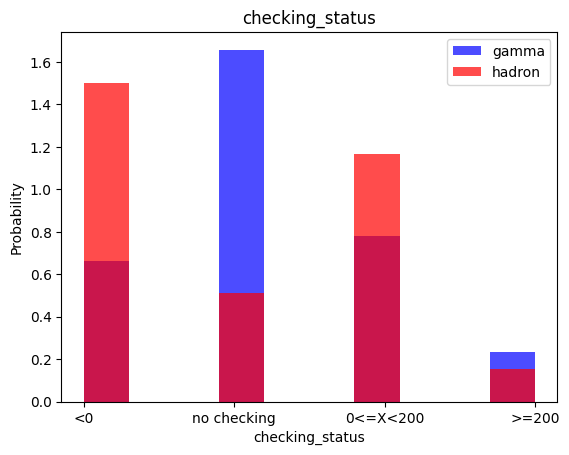

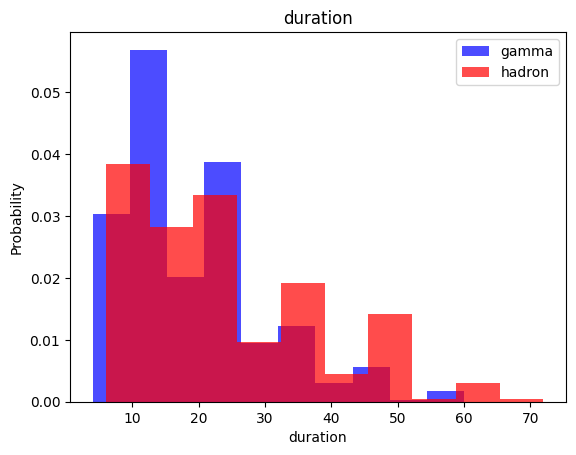

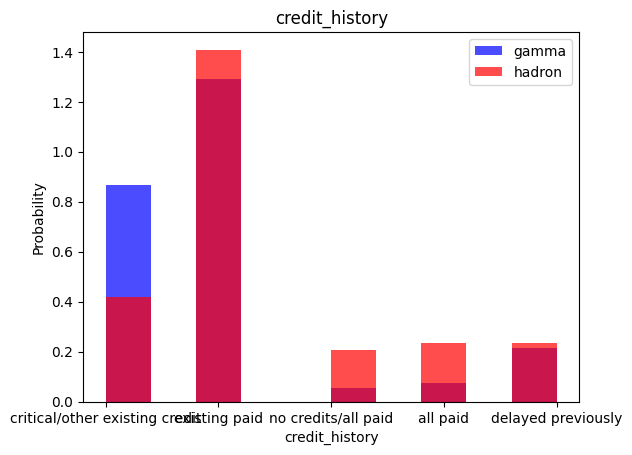

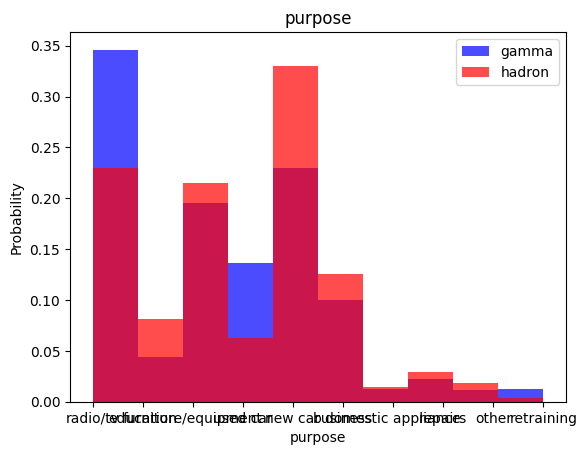

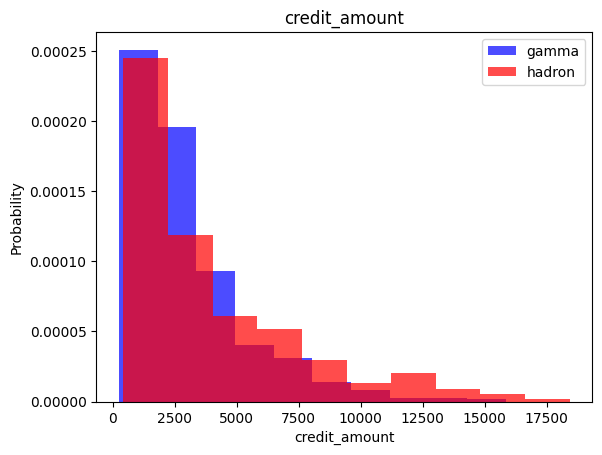

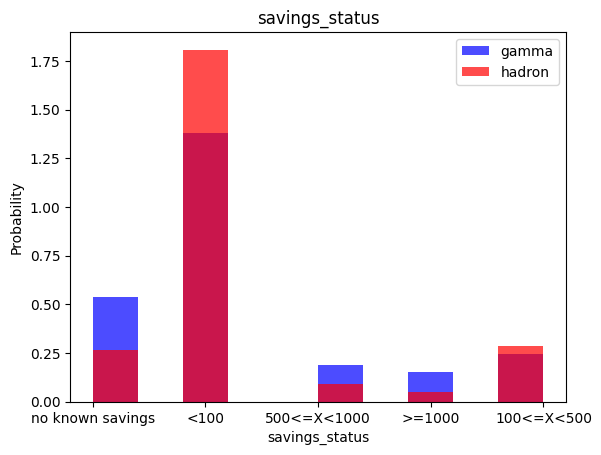

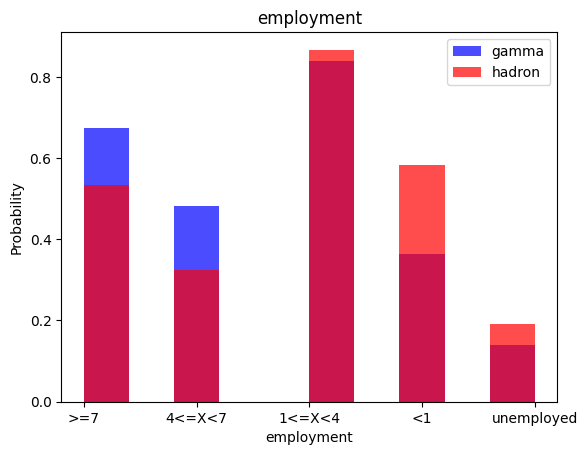

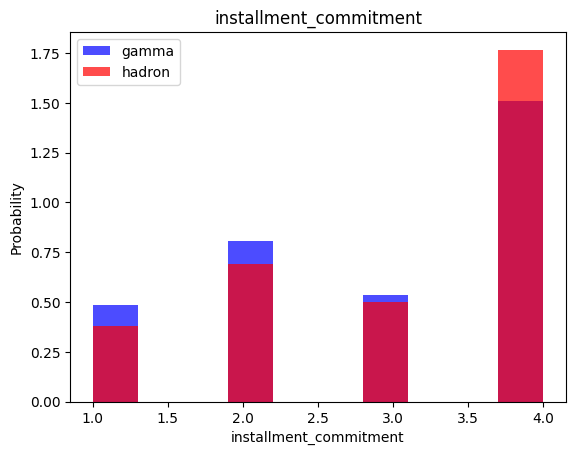

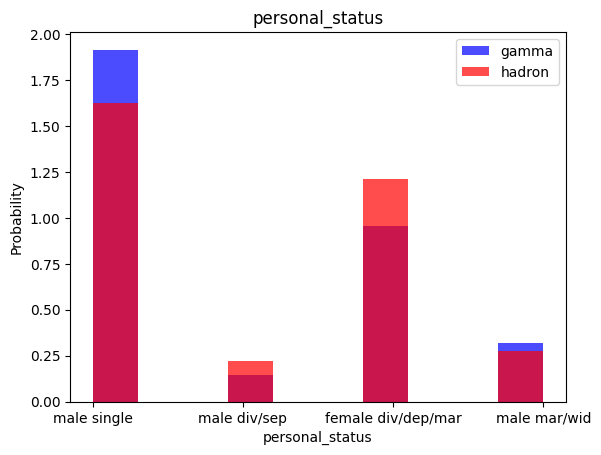

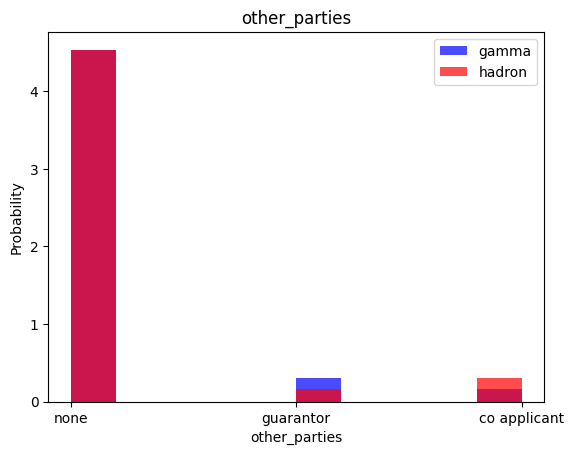

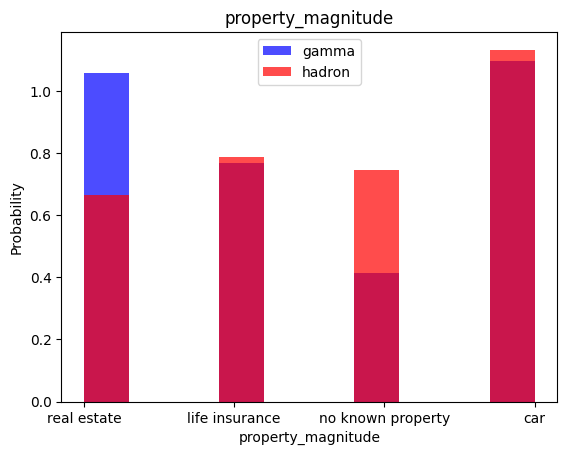

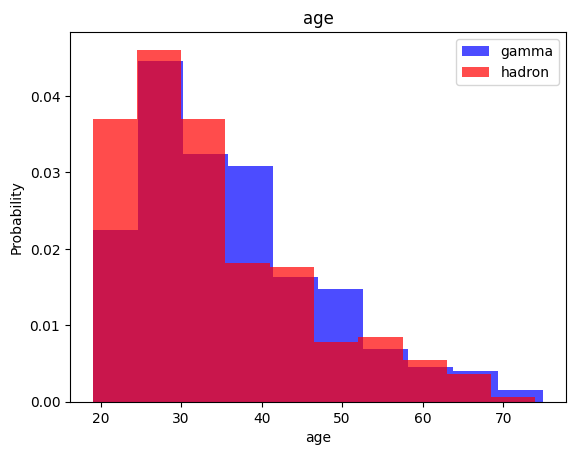

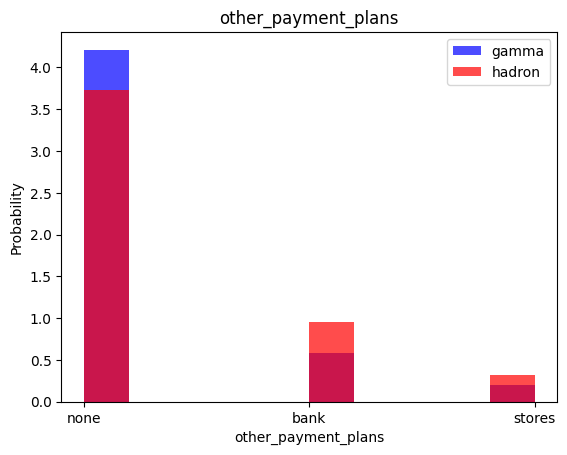

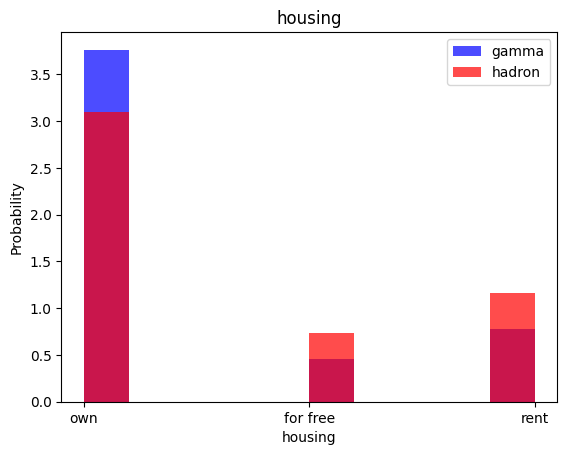

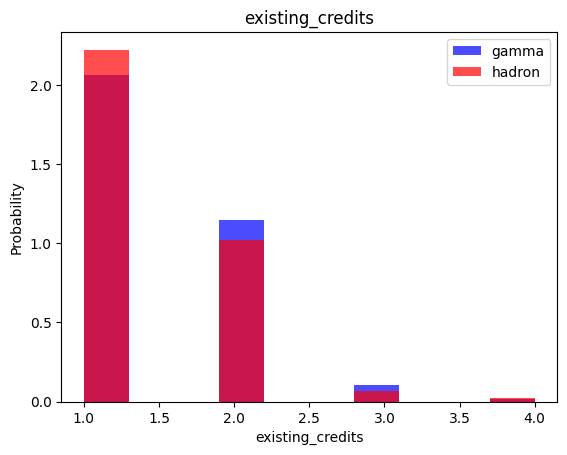

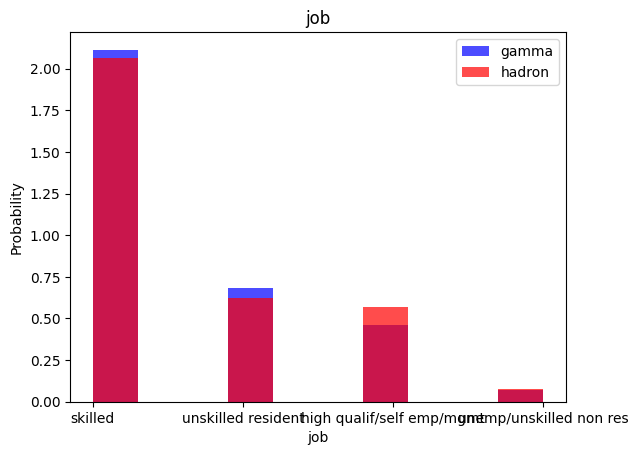

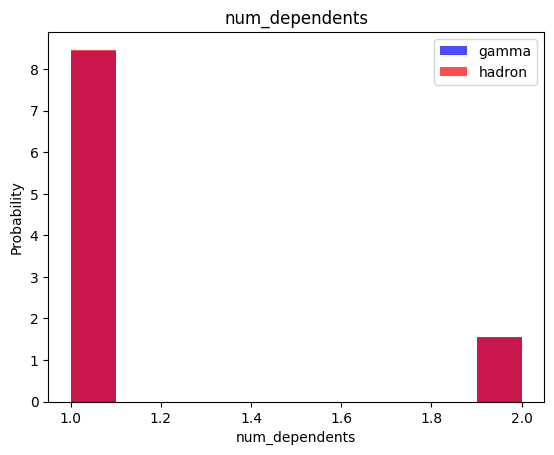

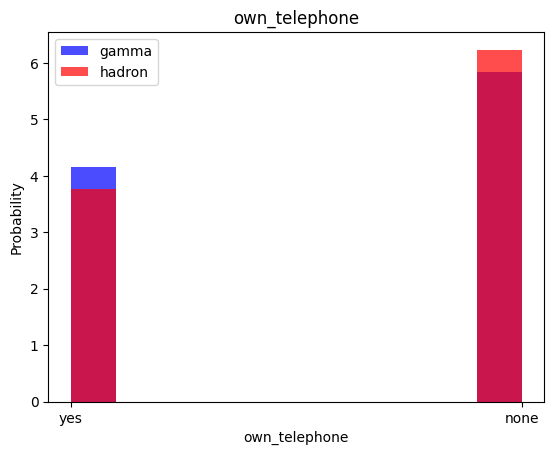

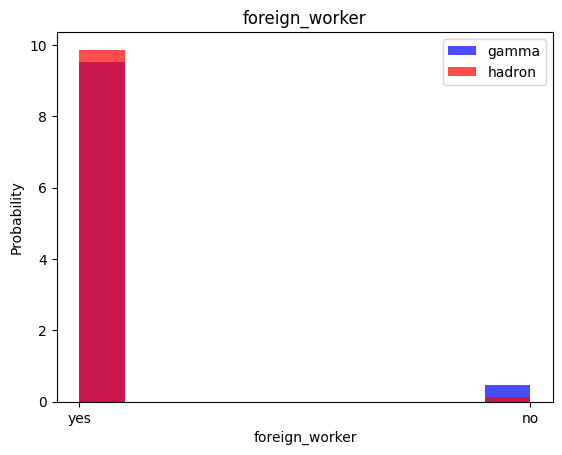

In [326]:
for label in cols[:-1]:
    plt.hist(df[df["class"]=="good"][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]=="bad"][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [327]:
def scale_dataset(dataframe):
    x = datafram(dataframe.cols[:-1].values)
    y = datafram(datafram.cols[:-1].values)
    
    scaler = StandardScaler()
    x = scaler.fit_transofmr(x)
    
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    
    return data, x, y

In [328]:
# print(len(train[train["class"]==1]))
# print(len(train[train["class"]==0]))

In [329]:
# For the model to run correctly, we must quantify the columns. However, the actual variables 
# don't matter what we assign them to because they'll be normalized by the model with
# the standard deviation being factored into it. We can also drop irrelevant columnns.

In [330]:
# Checking status is irrelevant (the data set only gives ranges and no checking, not a huge factor)
df.drop('checking_status', axis=1, inplace=True)
# Other parties are irrelevant
df.drop('other_parties', axis=1, inplace=True)
# Other payments are irrelevant
df.drop('other_payment_plans', axis=1, inplace=True)
# I believe that dropping the number of dependents is important because we don't want the model to draw
# or create false predictions based on the number of dependents.
df.drop('num_dependents', axis=1, inplace=True)
# Whether or not the person owns a telephone is irrelevant
df.drop('own_telephone', axis=1, inplace=True)
# Foreign working status is irrelevant
df.drop('foreign_worker', axis=1, inplace=True)

In [331]:
# We must find all unique columns

In [332]:
df.columns

Index(['duration', 'credit_history', 'purpose', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'personal_status', 'residence_since', 'property_magnitude', 'age',
       'housing', 'existing_credits', 'job', 'class'],
      dtype='object')

In [333]:
# Going to clean the data now(we have qualitative variables and need quantitative)
# Revised this to use KPrototype clustering, thus must identify categorical columns

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duration                1000 non-null   float64
 1   credit_history          1000 non-null   object 
 2   purpose                 1000 non-null   object 
 3   credit_amount           1000 non-null   float64
 4   savings_status          1000 non-null   object 
 5   employment              1000 non-null   object 
 6   installment_commitment  1000 non-null   float64
 7   personal_status         1000 non-null   object 
 8   residence_since         1000 non-null   float64
 9   property_magnitude      1000 non-null   object 
 10  age                     1000 non-null   float64
 11  housing                 1000 non-null   object 
 12  existing_credits        1000 non-null   float64
 13  job                     1000 non-null   object 
 14  class                   1000 non-null   o

In [335]:
df["credit_history"].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

In [336]:
# Simply creating a list of categorical items to input into the KPrototype Model
# categorical_columns = ["credit_history", "purpose", ""]
categorical_columns = [1, 2, 4, 5, 7, 9, 11, 13, 14]
kproto = KPrototypes(n_clusters= 2, verbose=2)

Initialization method and algorithm are deterministic. Setting n_init to 1.


In [337]:
# Partitioning the data into a training, validation, and test set

In [338]:
# Revision, I will NOT be creating a training data set because the standard scaler will not work on any categorical
# data, so I am going to create clusters from the CSV as a whole
# when partitioning the data, it is random and thus you will get a varying amount of 
# good/bad with each run of this program, making the model predictability weak

In [339]:
# train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [340]:
# train

In [341]:
# clusters = kproto.fit_predict(train, categorical=categorical_columns)
clusters = kproto.fit_predict(df, categorical=categorical_columns)
pd.Series(clusters).value_counts()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 304, ncost: 2940206130.6562653
Run: 1, iteration: 2/100, moves: 113, ncost: 2468010094.547401
Run: 1, iteration: 3/100, moves: 33, ncost: 2410575267.1420465
Run: 1, iteration: 4/100, moves: 8, ncost: 2406540275.595313
Run: 1, iteration: 5/100, moves: 1, ncost: 2406472766.718858
Run: 1, iteration: 6/100, moves: 0, ncost: 2406472766.718858
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 198, ncost: 2667861580.0333505
Run: 2, iteration: 2/100, moves: 72, ncost: 2430496813.5220857
Run: 2, iteration: 3/100, moves: 21, ncost: 2407951132.781652
Run: 2, iteration: 4/100, moves: 4, ncost: 2406540275.595313
Run: 2, iteration: 5/100, moves: 1, ncost: 2406472766.718858
Run: 2, iteration: 6/100, moves: 0, ncost: 2406472766.718858
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iterati

0    825
1    175
Name: count, dtype: int64

In [342]:
print(kproto.cluster_centroids_)

[['17.96' '2185.7806060606063' '3.0775757575757576' '2.8327272727272725'
  '35.27393939393939' '1.3927272727272728' 'existing paid' 'radio/tv'
  '<100' '1<=X<4' 'male single' 'car' 'own' 'skilled' 'good']
 ['34.777142857142856' '8388.50857142857' '2.48' '2.902857142857143'
  '36.82857142857143' '1.4742857142857142' 'existing paid' 'used car'
  '<100' '1<=X<4' 'male single' 'car' 'own' 'skilled' 'good']]


In [343]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [344]:
cluster_dict

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [345]:
# train["cluster"]=cluster_dict
df["cluster"]=cluster_dict

In [346]:
df

,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,class,cluster
0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,4.0,real estate,67.0,own,2.0,skilled,good,0
1,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,2.0,real estate,22.0,own,1.0,skilled,bad,1
2,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,3.0,real estate,49.0,own,1.0,unskilled resident,good,0
3,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,4.0,life insurance,45.0,for free,1.0,skilled,good,1
4,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,4.0,no known property,53.0,for free,2.0,skilled,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,4.0,real estate,31.0,own,1.0,unskilled resident,good,0
996,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,4.0,life insurance,40.0,own,1.0,high qualif/self emp/mgmt,good,0
997,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,4.0,car,38.0,own,1.0,skilled,good,0
998,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,4.0,no known property,23.0,for free,1.0,skilled,bad,0


In [347]:
correct = 0
# for index, row in train.iterrows():
for index, row in df.iterrows():
    print(row["class"])
    print(row["cluster"])
    if row["class"] == "good" and row["cluster"] == 0:
        correct = correct + 1
        print("Good match")
    if row["class"] == "bad" and row["cluster"] == 1:
        correct =correct + 1
        print("Bad match")
    
    print("")

        
print(correct)

good
0
Good match

bad
1
Bad match

good
0
Good match

good
1

bad
0

good
1

good
0
Good match

good
1

good
0
Good match

bad
0

bad
0

bad
0

good
0
Good match

bad
0

good
0
Good match

bad
0

good
0
Good match

good
1

bad
1
Bad match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

bad
1
Bad match

good
0
Good match

good
0
Good match

good
1

good
0
Good match

good
0
Good match

bad
0

good
1

bad
0

good
0
Good match

good
0
Good match

good
0
Good match

good
0
Good match

good
1

good
1

bad
1
Bad match

good
0
Good match

good
0
Good match

good
0
Good match

good
1

good
0
Good match

good
0
Good match

good
1

good
0
Good match

good
0
Good match

bad
0

good
0
Good match

bad
1
Bad match

good
1

good
0
Good match

bad
1
Bad match

good
0
Good match

good
0
Good match

bad
0

bad
1
Bad match

good
0
Good match

good
0
Good match

g

In [348]:
# total = len(train)
total = len(df)

In [349]:
## Accuracy:
# The use of 1 and 0 is random for good and bad, but we know the range is around 60%, so we can use the Max function
accuracy = max((correct/total)*100, (1-(correct/total)*100))
accuracy = round(accuracy, 1)
print(str(accuracy) + "%")

67.1%


In [350]:
# 67 percent is not bad considering this is a relatively small data set and the categorical variables are 
# a little poor

In [318]:
# To try to predict you can just use the graphs from seaborn or even matplotlib and take in your users information and see where they
# might lay in the clusters.